# Final Project Machine Learning !

1. Pilih Dataset : https://drive.google.com/drive/folders/1BCpAunmFTO5V85X6Qrzxs6QGDtGrv0JU?usp=sharing
2. Implement Data analisis pada salah satu dari dataset tersebut 

What to do ? 
1. Do Exploratory Data Analysis (at least 1 visualisasi data)
2. Do Data Preprocessing (explain each step why u do the preprocessing)
3. Do Feature Engineering (Explain why u choose that Feature in ur analysis)
4. Modelling 
5. Model Evaluation 
6. Summary (Kesimpulan apa yang kamu dapat dari analisis yang kalian lakuin dan hasil nya apa)

Submission Form: 
- https://forms.gle/87UbNHKhdccn8CSh6


## import library

In [508]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### read dataset


In [509]:
df1 = pd.read_csv('Dataset_1.csv')
df1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
0,-1.032690,2.096221,0.384194,-1.214555,2.432575,1.069743,-1.076878,2.140959,0.403971,-1.039528,...,2.423807,0.833363,-0.932956,2.047133,0.089361,-1.062281,2.080691,0.412019,-1.244573,3
1,-0.509585,-0.896533,-0.465612,0.033544,-0.781463,-0.934908,0.061976,-0.712155,-0.929289,-0.624238,...,-0.783508,-0.877666,0.084089,-0.718668,-0.965767,-0.567989,-0.911335,-0.415529,0.167377,3
2,-1.032690,-0.896533,1.243594,-1.101241,-0.781463,-0.934908,-0.355857,-0.020836,-0.726172,-1.039528,...,-0.783508,-0.851601,-0.481456,0.041508,-0.623651,-1.062281,-0.911335,1.288949,-1.201469,0
3,-1.024914,1.367049,0.014966,-1.141605,1.102526,0.197138,-0.921322,1.064377,0.235659,-0.973558,...,1.228601,0.089344,-0.932956,1.093751,0.017282,-0.920086,1.336901,0.012367,-0.990998,3
4,1.585219,-0.896533,-0.782318,0.692780,-0.781463,0.732274,-0.113010,-1.048795,1.248580,1.636419,...,-0.783508,0.902548,0.000080,-1.049062,1.518648,1.607938,-0.911335,-0.824106,0.663292,0


In [510]:
df1['label'].unique()

array([3, 0, 2, 1])

## Exploratory Data Analysis

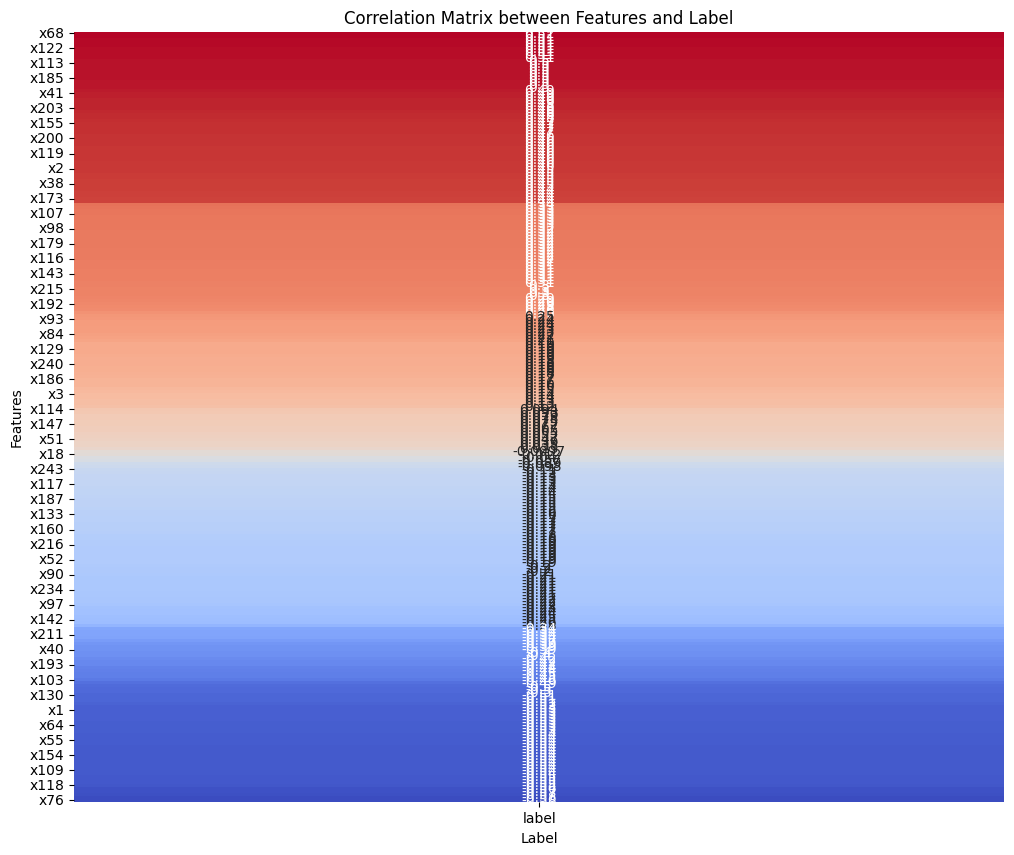

In [511]:
correlation = df1.corr()

correlation_with_label = correlation['label'].sort_values(ascending=False)

correlation_with_label = correlation_with_label.drop('label')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_with_label.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation Matrix between Features and Label")
plt.xlabel("Label")
plt.ylabel("Features")
plt.show()

Melalui visualisasi corelation maps, dapat dilihat fitur mana saja yang memiliki hubungan yang cukup tinggi terhadap label.

## Data Preprocessing


In [512]:
missing_data = df1.isna().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x253     0
x254     0
x255     0
x256     0
label    0
Length: 257, dtype: int64


Tahap preprocessing untuk melakukan pemeriksaan terhadap data yang hilang (null), setelah di periksa tidak ada data yang memiliki nilai null dalam dataset

In [513]:
# Menghapus baris dengan nilai yang hilang
df1_cleaned = df1.dropna()

print("Jumlah data yang hilang: ", len(df1) - len(df1_cleaned))

Jumlah data yang hilang:  0


In [514]:
print(df1.describe())

                x1           x2           x3           x4           x5  \
count  3264.000000  3264.000000  3264.000000  3264.000000  3264.000000   
mean     -0.108383     0.109415     0.012731    -0.038641     0.025888   
std       0.918837     1.056640     0.940577     1.073387     1.036104   
min      -1.032690    -0.896533    -1.285932    -1.214555    -0.781463   
25%      -1.032690    -0.896533    -0.700087    -1.015734    -0.781463   
50%      -0.332834    -0.207360    -0.011766    -0.083122    -0.574530   
75%       0.618180     0.932127     0.593603     0.545812     0.749548   
max       2.725864     3.223942     3.532661     5.231793     3.814274   

                x6           x7           x8           x9          x10  ...  \
count  3264.000000  3264.000000  3264.000000  3264.000000  3264.000000  ...   
mean     -0.055990    -0.071048     0.110057    -0.039071    -0.110402  ...   
std       0.916824     0.998030     1.013487     0.812572     0.939323  ...   
min      -0.93490

Kemudian saya mendeskripsikan dataset untuk mendapatkan informasi deskriptif seperti rata-rata, niali minimum, standar deviasi dan lainnya. Dari sini saya berkesimpulan bahwa nilai dari seluruh kolom sudah berada dalam rentang yang sesuai, sehingga tidak diperlukan proses Normalisasi ataupun Standarisasi

## Feature Engineering

Feature enginerring bertujuan untuk membuat representasi dari dataset lebih informatif bagi model machine learning. Menghapus beberapa fitur yang memiliki korelasi yang rendah terhadap label.

In [515]:
# Menampilkan fitur dengan korealasi tertinggi
top_features = correlation_with_label.head(56)

print("Fitur dengan korelasi tertinggi:")
print(top_features)

Fitur dengan korelasi tertinggi:
x68     0.516664
x5      0.513077
x149    0.510799
x14     0.509992
x194    0.509926
x122    0.506174
x131    0.506080
x158    0.505445
x239    0.505032
x50     0.503620
x113    0.502250
x77     0.502211
x59     0.501520
x230    0.500831
x23     0.499790
x185    0.499668
x248    0.497150
x86     0.496737
x95     0.496104
x167    0.493905
x41     0.490287
x32     0.487472
x212    0.486240
x104    0.486174
x176    0.484807
x203    0.483716
x140    0.482301
x110    0.476778
x56     0.475370
x221    0.472845
x155    0.467117
x236    0.466831
x92     0.466804
x65     0.466198
x182    0.464035
x200    0.462626
x209    0.462289
x74     0.461283
x101    0.458920
x245    0.458703
x119    0.458535
x83     0.458301
x254    0.457142
x218    0.456222
x47     0.455960
x2      0.454776
x20     0.454681
x128    0.449263
x29     0.449122
x227    0.448177
x38     0.447293
x191    0.447272
x11     0.444639
x137    0.442938
x164    0.441567
x173    0.438921
Name: label, dt

Dalam correlation maps saya mengambil mencari kolumn x173 sebagai patokan bahwa fitur fitur memiliki korelasi yang tinggi terhadap label  

In [516]:
# Memisahkan atribut dengan label
X = df1[top_features.index]
y = df1['label']

Diatas saya melakukan asumsi bahwa tidak diperlukan lagi scaling terhadap fitur dalam dataset, adapun jika saya melakukan scalling terhadap fitur dalam dataset tidak akan mengakibatkan penurunan skor akurasi dari model-model yang saya bangun dibawah.


1.   Logistic Regression => 0.593
2.   Decision Tree       => 0.602
3.   XG-Boost            => 0.651



In [517]:
# Standarisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,x68,x5,x149,x14,x194,x122,x131,x158,x239,x50,...,x20,x128,x29,x227,x38,x191,x11,x137,x164,x173
0,2.350247,2.323179,2.347186,2.354552,2.322437,2.338606,2.348575,2.365374,2.358873,2.344589,...,1.916507,1.889458,1.864105,1.877167,1.874266,1.802113,1.859025,1.817427,1.855474,1.839525
1,-0.766282,-0.779338,-0.783475,-0.774503,-0.776242,-0.789849,-0.791776,-0.789378,-0.781138,-0.787736,...,-0.942231,-0.947228,-0.961778,-0.958807,-0.952949,-1.052628,-0.968493,-0.979415,-0.963532,-0.973566
2,-0.766282,-0.779338,-0.783475,-0.774503,-0.776242,-0.789849,-0.791776,-0.789378,-0.781138,-0.787736,...,-0.942231,-0.947228,-0.961778,-0.958807,-0.952949,-0.955420,-0.968493,-0.979415,-0.963532,-0.973566
3,1.008232,1.039280,1.092980,1.025759,1.006530,1.105111,1.125918,1.140821,1.085421,1.094666,...,1.247587,1.229415,1.203284,1.210430,1.239292,1.165972,1.227692,1.158231,1.190463,1.178475
4,-0.766282,-0.779338,-0.783475,-0.774503,-0.776242,-0.789849,-0.791776,-0.789378,-0.781138,-0.787736,...,-0.942231,-0.947228,-0.961778,-0.958807,-0.952949,-1.052628,-0.968493,-0.979415,-0.963532,-0.973566


## Splitting Dataset

In [518]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# untuk fitur yang di lakukan standarisasi
# UNCOMMENT UNTUK DEMO
# X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

## Logistic Regression

In [519]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [520]:
pred = model.predict(X_test)

In [521]:
accuracy = round(accuracy_score(pred, y_test), 3)
print("Accuracy:", accuracy)

Accuracy: 0.597


## Decision Tree

In [522]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

In [523]:
pred = tree_model.predict(X_test)

In [524]:
accuracy = round(accuracy_score(pred, y_test), 3)
print('Accuracy: ', accuracy)

Accuracy:  0.6


## XG-Boost

In [525]:
import xgboost as xgb
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [526]:
pred = xg_model.predict(X_test)

In [527]:
accuracy = round(accuracy_score(pred, y_test), 3)
print('Accuracy: ', accuracy)

Accuracy:  0.651


## Kesimpulan

Dataset yang diberikan merupakan dataset multiple classification. Dataset ini cocok digunakan dalam membuat model prediksi klasifikasi. Dataset memiliki kolom label dengan value [0,1,2,3] yang merupakan label dan 256 kolom fitur. Tidak semua dari kolom tersebut memiliki hubungan yang kuat untuk memengaruhi kategori atau label. Maka dari itu dibutuhkan correlation maps untuk memetakan mana fitur yang memiliki korelasi yang tinggi terhadap label. Setelah itu fitur yang memiliki korelasi tinggi tersebut digunakan untuk melatih model Machine Learning. Sebelum melatih model, data dibagi jadi data latih dan data uji dengan perbandingan 4:1 atau 20% sebagai data uji.

Saya melatih model Regresi Logistik, Decision tree, dan XG-Boost. Akurasi dari regresi logistik yang paling kecil disini karena keterbatasan model dalam menangani kelas yang tidak seimbang atau hubungan non-linier antara fitur dan label. Decision Tree cenderung lebih fleksibel dalam menangani hubungan non-linier dan interaksi antar fitur, tetapi cenderung overfitting jika tidak diatur dengan baik.  XGBoost memberikan akurasi yang paling tinggi di antara ketiga model. XGBoost adalah model ensemble yang kuat dan cenderung memberikan hasil yang baik dalam berbagai jenis masalah klasifikasi.